# Exploratory Data Analysis with Pandas

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

We will go through this notebook to:
1. Learn to reshape our data and see some features by performing operations over it
2. Discover visualization methods

## Transforming and summarizing data

In [2]:
import urllib3
import pandas as pd

url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"

#load the csv
airports = pd.read_csv(url,header=None)

print("Check DataFrame types")
display(airports.dtypes)

Check DataFrame types


0       int64
1      object
2      object
3      object
4      object
5      object
6     float64
7     float64
8       int64
9      object
10     object
11     object
12     object
13     object
dtype: object

Here you can find an explanation of each variable:

1. **Airport** ID	Unique OpenFlights identifier for this airport.
2. **Name**	Name of airport. May or may not contain the City name.
3. **City**	Main city served by airport. May be spelled differently from Name.
4. **Country**	Country or territory where airport is located.
5. **IATA/FAA**	3-letter FAA code, for airports located in Country "United States of America". 3-letter IATA code, for all other airports. Blank if not assigned.
6. **ICAO**	4-letter ICAO code. Blank if not assigned.
7. **Latitude**	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
8. **Longitude**	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
9. **Altitude**	In feet.
10. **Timezone**	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
11. **DST**	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
12. **Tz database** time zone

In [3]:
import numpy as np

print("-> Original DF")
display(airports.head())

#we can add a name to each variable
h = ["airport_id","name","city","country","IATA","ICAO","lat","lon","alt","tz","DST","tz_db"]
airports = airports.iloc[:,:12]
airports.columns = h

print("-> Original DF with proper names")
display(airports.head())

print("-> With the proper names it is easier to check correctness")
display(airports.dtypes)

-> Original DF


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


-> Original DF with proper names


,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby


-> With the proper names it is easier to check correctness


airport_id      int64
name           object
city           object
country        object
IATA           object
ICAO           object
lat           float64
lon           float64
alt             int64
tz             object
DST            object
tz_db          object
dtype: object

Convert alt to m

In [4]:
airports.alt.describe()

count     7184.000000
mean      1011.833101
std       1608.349308
min      -1266.000000
25%         66.000000
50%        354.000000
75%       1197.250000
max      14219.000000
Name: alt, dtype: float64

In [5]:
airports.alt = airports.alt * 0.3048

In [6]:
airports.dtypes

airport_id      int64
name           object
city           object
country        object
IATA           object
ICAO           object
lat           float64
lon           float64
alt           float64
tz             object
DST            object
tz_db          object
dtype: object

Check if we have nans.

In [7]:
airports.isnull().sum(axis=0)

airport_id     0
name           0
city          44
country        0
IATA           2
ICAO           0
lat            0
lon            0
alt            0
tz             0
DST            0
tz_db          0
dtype: int64

In [8]:
# we can create a new label whoch corresponds to not having data
airports.IATA.fillna("Blank", inplace=True)
airports.ICAO = airports.ICAO.fillna("Blank")

In [9]:
airports.isnull().sum(axis=0)

airport_id     0
name           0
city          44
country        0
IATA           0
ICAO           0
lat            0
lon            0
alt            0
tz             0
DST            0
tz_db          0
dtype: int64

Let's check errors.
* Latitudes range from -90 to 90.
* Longitudes range from -180 to 180.

In [10]:
((airports.lat > 90) & (airports.lat < -90)).any()

False

In [11]:
((airports.lon > 180) & (airports.lon < -180)).any()

False

We can chech outliers in the altitude

In [12]:
airports.alt.describe()

count    7184.000000
mean      308.406729
std       490.224869
min      -385.876800
25%        20.116800
50%       107.899200
75%       364.921800
max      4333.951200
Name: alt, dtype: float64

let's explore 5 and 95 percentiles

In [13]:
qtls = airports.alt.quantile([.05,.5,.95],interpolation="higher")
qtls

0.05       2.4384
0.50     107.8992
0.95    1363.3704
Name: alt, dtype: float64

In [14]:
# check how many of them are below the median
(airports.alt <= qtls[0.5]).sum()

3593

In [15]:
#check how many of them are above of the median
(airports.alt >= qtls[0.5]).sum()

3597

In [16]:
#check how many of them are below the .05 percentile
(airports.alt <= qtls[0.05]).sum()

373

In [17]:
#check how many of them are above the .95 percentile
(airports.alt >= qtls[0.95]).sum()

360

In [18]:
airports.shape[0]*.05

359.20000000000005

In [19]:
print("-> Check which airports are out of 5% range")
display(airports[(airports.alt < qtls[0.05])].head(10))

-> Check which airports are out of 5% range


,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db
10,11,Akureyri Airport,Akureyri,Iceland,AEY,BIAR,65.660004,-18.072701,1.8288,0,N,Atlantic/Reykjavik
399,403,Emden Airport,Emden,Germany,EME,EDWE,53.391109,7.227500,0.9144,1,E,Europe/Berlin
400,404,Leer-Papenburg Airport,Leer,Germany,\N,EDWF,53.271942,7.441667,0.9144,1,E,Europe/Berlin
402,406,Borkum Airport,Borkum,Germany,BMK,EDWR,53.596390,6.709167,0.9144,1,E,Europe/Berlin
403,407,Norderney Airport,Norderney,Germany,NRD,EDWY,53.706944,7.230000,2.1336,1,E,Europe/Berlin
495,500,Shoreham Airport,Shoreham By Sea,United Kingdom,ESH,EGKA,50.835602,-0.297222,2.1336,0,E,Europe/London
574,580,Amsterdam Airport Schiphol,Amsterdam,Netherlands,AMS,EHAM,52.308601,4.763890,-3.3528,1,E,Europe/Amsterdam
582,588,De Kooy Airport,De Kooy,Netherlands,DHR,EHKD,52.923401,4.780620,0.9144,1,E,Europe/Amsterdam
583,589,Lelystad Airport,Lelystad,Netherlands,LEY,EHLE,52.460300,5.527220,-3.9624,1,E,Europe/Amsterdam
584,590,Leeuwarden Air Base,Leeuwarden,Netherlands,LWR,EHLW,53.228600,5.760560,0.9144,1,E,Europe/Amsterdam


Additionaly to what we have seen, we have extra functions to see how shaped and what values our data has.
* **sample data:** we can take a random sample of the obesrvations to avoid the ordering bias (if we head data, it can be sorted so some of the examples are ok, let's say the 100 first and the rest have some errors)
* **sort data:** to get obesrvations with higher or lower values

In [20]:
print("-> Showing a sample of ten values")
airports.sample(n=10)

-> Showing a sample of ten values


,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db
1810,1868,Panama Pacific International Airport,Howard,Panama,BLB,MPHO,8.914790,-79.599602,15.8496,-5,U,America/Panama
11,12,Egilsstaðir Airport,Egilsstadir,Iceland,EGS,BIEG,65.283302,-14.401400,23.1648,0,N,Atlantic/Reykjavik
5808,7910,Fes Sefrou Airport,Fes,Morocco,\N,GMFU,34.008099,-4.965560,469.0872,0,U,Africa/Casablanca
5517,7399,Barcelos Airport,Barcelos,Brazil,BAZ,SWBC,-0.981292,-62.919601,34.1376,-4,S,America/Boa_Vista
6068,8366,Lawrence Municipal Airport,Lawrence,United States,LWC,KLWC,39.011200,-95.216599,253.8984,-6,A,America/Chicago
5489,7360,El Bagre Airport,El Bagre,Colombia,EBG,SKEB,7.596470,-74.808900,54.8640,-5,U,America/Bogota
5178,6849,Grand Marais Cook County Airport,Grand Marais,United States,GRM,KCKC,47.838299,-90.382896,548.3352,-6,U,America/Chicago
2810,2967,Volgograd International Airport,Volgograd,Russia,VOG,URWW,48.782501,44.345501,146.9136,3,N,Europe/Moscow
2801,2957,Kemerovo Airport,Kemorovo,Russia,KEJ,UNEE,55.270100,86.107201,263.0424,7,N,Asia/Krasnoyarsk
4066,4362,Talagi Airport,Arkhangelsk,Russia,ARH,ULAA,64.600304,40.716702,18.8976,3,N,Europe/Moscow


In [21]:
print("-> Showing the airports in higher positions")
airports.sort_values(by="alt",ascending=True)[:10]

-> Showing the airports in higher positions


,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db
1558,1600,Bar Yehuda Airfield,Metzada,Israel,\N,LLMZ,31.328199,35.388599,-385.8768,2,E,Asia/Jerusalem
1553,1595,Ein Yahav Airfield,Eyn-yahav,Israel,\N,LLEY,30.621700,35.203300,-49.9872,2,E,Asia/Jerusalem
5670,7646,Jacqueline Cochran Regional Airport,Palm Springs,United States,TRM,KTRM,33.626701,-116.160004,-35.0520,-8,A,America/Los_Angeles
4062,4357,Atyrau Airport,Atyrau,Kazakhstan,GUW,UATG,47.121899,51.821400,-21.9456,5,U,Asia/Oral
2069,2151,Ramsar Airport,Ramsar,Iran,RZR,OINR,36.909901,50.679600,-21.3360,3.5,E,Asia/Tehran
2809,2966,Astrakhan Airport,Astrakhan,Russia,ASF,URWA,46.283298,48.006302,-19.8120,4,N,Europe/Samara
4572,5932,Noshahr Airport,Noshahr,Iran,NSH,OINN,36.663300,51.464699,-18.5928,3.5,E,Asia/Tehran
3474,3689,Imperial County Airport,Imperial,United States,IPL,KIPL,32.834202,-115.579002,-16.4592,-8,A,America/Los_Angeles
3540,3758,El Centro Naf Airport,El Centro,United States,NJK,KNJK,32.829201,-115.671997,-12.8016,-8,A,America/Los_Angeles
2049,2123,Sardar-e-Jangal Airport,Rasht,Iran,RAS,OIGG,37.323333,49.617778,-12.1920,3.5,E,Asia/Tehran


We can create new variables

In [22]:
airports.tz_db

0       Pacific/Port_Moresby
1       Pacific/Port_Moresby
2       Pacific/Port_Moresby
3       Pacific/Port_Moresby
4       Pacific/Port_Moresby
5       Pacific/Port_Moresby
6            America/Godthab
7            America/Godthab
8            America/Godthab
9              America/Thule
10        Atlantic/Reykjavik
11        Atlantic/Reykjavik
12        Atlantic/Reykjavik
13        Atlantic/Reykjavik
14        Atlantic/Reykjavik
15        Atlantic/Reykjavik
16        Atlantic/Reykjavik
17        Atlantic/Reykjavik
18        Atlantic/Reykjavik
19        Atlantic/Reykjavik
20           America/Toronto
21          America/Winnipeg
22           America/Halifax
23          America/St_Johns
24         America/Vancouver
25          America/Edmonton
26           America/Toronto
27           America/Toronto
28          America/Winnipeg
29         America/Vancouver
                ...         
7154                      \N
7155                      \N
7156                      \N
7157          

In [23]:
airports["continent"] = airports.tz_db.str.split("/").str[0]
airports.continent.unique()

array(['Pacific', 'America', 'Atlantic', 'Africa', 'Europe', 'Arctic',
       'Indian', 'Asia', '\\N', 'Antarctica', 'Australia'], dtype=object)

In [24]:
airports.continent.value_counts()

America       2569
Europe        1464
Asia          1306
Africa         612
\N             593
Pacific        268
Australia      243
Indian          68
Atlantic        50
Antarctica       7
Arctic           4
Name: continent, dtype: int64

In [25]:
(airports.continent.value_counts()/airports.continent.value_counts().sum())*100

America       35.760022
Europe        20.378619
Asia          18.179287
Africa         8.518931
\N             8.254454
Pacific        3.730512
Australia      3.382517
Indian         0.946548
Atlantic       0.695991
Antarctica     0.097439
Arctic         0.055679
Name: continent, dtype: float64

In [26]:
airports[airports.continent == "\\N"].shape

(593, 13)

In [27]:
airports.continent = airports.continent.replace('\\N',"unknown")
airports.tz_db = airports.tz_db.replace('\\N',"unknown")

airports.continent.unique()

array(['Pacific', 'America', 'Atlantic', 'Africa', 'Europe', 'Arctic',
       'Indian', 'Asia', 'unknown', 'Antarctica', 'Australia'],
      dtype=object)

In [28]:
airports[airports.continent == "unknown"].head()

,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db,continent
1846,1907,Leeward Point Field,Guantanamo,Cuba,\N,MUGM,19.906500,-75.207100,17.0688,-5,U,unknown,unknown
1899,1966,Tabiteuea North Airport,Tabiteuea North,Kiribati,TBF,NGTE,-1.224470,174.776001,2.1336,12,U,unknown,unknown
1903,1971,Rurutu Airport,Rurutu,French Polynesia,RUR,NTAR,-22.434099,-151.360992,5.4864,-10,U,unknown,unknown
1908,1976,Reao Airport,Reao,French Polynesia,REA,NTGE,-18.465900,-136.440002,3.6576,-10,U,unknown,unknown
1924,1993,Hao Airport,Hao Island,French Polynesia,HOI,NTTO,-18.074800,-140.945999,3.0480,-10,U,unknown,unknown


We can place hemisfere

In [29]:
hem_select = lambda x: "South" if x < 0 else "North"
airports["hemisphere"] = airports.lat.apply(hem_select)

We can calculate percentages.

In [30]:
(airports.hemisphere.value_counts() / airports.shape[0]) * 100

North    79.468263
South    20.531737
Name: hemisphere, dtype: float64

In [31]:
(airports.continent.value_counts() / airports.shape[0]) * 100

America       35.760022
Europe        20.378619
Asia          18.179287
Africa         8.518931
unknown        8.254454
Pacific        3.730512
Australia      3.382517
Indian         0.946548
Atlantic       0.695991
Antarctica     0.097439
Arctic         0.055679
Name: continent, dtype: float64

In [32]:
((airports.country.value_counts() / airports.shape[0]) * 100).sample(10)

Saint Lucia                       0.027840
Bhutan                            0.041759
American Samoa                    0.027840
Honduras                          0.167038
Malaysia                          0.556793
Qatar                             0.027840
Peru                              0.584633
Algeria                           0.598552
Vietnam                           0.334076
British Indian Ocean Territory    0.013920
Name: country, dtype: float64

In [33]:
((airports.country.value_counts() / airports.shape[0]) * 100).head(10)

United States     19.974944
Canada             5.804566
Australia          4.120267
Germany            3.354677
Russia             3.312918
Brazil             3.257238
France             2.978842
China              2.505568
United Kingdom     2.255011
Indonesia          1.739978
Name: country, dtype: float64

In [34]:
type(airports.country.value_counts())

pandas.core.series.Series

Let's transformate alt into qualitative

In [35]:
airports["alt_type"] = pd.cut(airports.alt,bins=3,labels=["low","med","high"])

In [36]:
airports.head()

,airport_id,name,city,country,IATA,ICAO,lat,lon,alt,tz,DST,tz_db,continent,hemisphere,alt_type
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,1609.9536,10,U,Pacific/Port_Moresby,Pacific,South,med
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,6.0960,10,U,Pacific/Port_Moresby,Pacific,South,low
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,1642.2624,10,U,Pacific/Port_Moresby,Pacific,South,med
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,72.8472,10,U,Pacific/Port_Moresby,Pacific,South,low
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,44.5008,10,U,Pacific/Port_Moresby,Pacific,South,low


Let's group data:

In [37]:
airp_group = airports.groupby(["continent","alt_type"])

The groups attribute is a dict whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group. In the above example we have:

In [38]:
airp_group.groups.keys()

dict_keys([('Africa', 'low'), ('Africa', 'med'), ('America', 'high'), ('America', 'low'), ('America', 'med'), ('Antarctica', 'high'), ('Antarctica', 'low'), ('Arctic', 'low'), ('Asia', 'high'), ('Asia', 'low'), ('Asia', 'med'), ('Atlantic', 'low'), ('Australia', 'low'), ('Australia', 'med'), ('Europe', 'low'), ('Europe', 'med'), ('Indian', 'low'), ('Indian', 'med'), ('Pacific', 'low'), ('Pacific', 'med'), ('unknown', 'low'), ('unknown', 'med')])

Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data.

In [39]:
airp_group.size()

continent   alt_type
Africa      low          477
            med          135
America     low         2369
            med          183
            high          17
Antarctica  low            6
            high           1
Arctic      low            4
Asia        low         1188
            med          104
            high          14
Atlantic    low           50
Australia   low          242
            med            1
Europe      low         1454
            med           10
Indian      low           66
            med            2
Pacific     low          261
            med            7
unknown     low          559
            med           34
dtype: int64

In [67]:
airp_group["alt"].agg({"max":np.max,"min":np.min,"mean":np.mean}).head()

C:\Users\ip476832\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


max   min          mean
continent alt_type                           
Africa    low        3868    -6   1305.666667
          med        8490  3900   5110.237037
America   low        3877  -115    678.683411
          med        8917  3897   5568.530055
          high      13355  9070  10869.647059

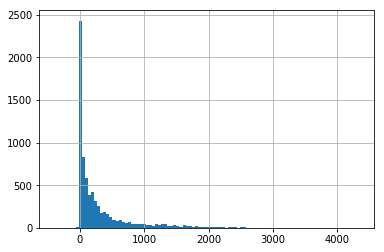

In [41]:
airports.alt.hist(bins=100)

Pandas has a handy .unstack() method—use it to convert the results into a more readable format and store that as a new variable

In [68]:
airp_group["alt"].sum().unstack()

alt_type,low,med,high
continent,,,
Africa,622803.0,689882.0,NaN
America,1607801.0,1019041.0,184784.0
Antarctica,3523.0,NaN,9300.0
Arctic,209.0,NaN,NaN
Asia,716899.0,557959.0,157086.0
Atlantic,9883.0,NaN,NaN
Australia,113205.0,4260.0,NaN
Europe,800612.0,54637.0,NaN
Indian,19352.0,9195.0,NaN


Remember that we also saw how to pivot table

In [69]:
airports.pivot_table(index="hemisphere",values="alt",aggfunc=np.mean)

,alt
hemisphere,
North,944.625328
South,1271.961356


In [70]:
airports.groupby("hemisphere").alt.mean()

hemisphere
North     944.625328
South    1271.961356
Name: alt, dtype: float64

## Visualizing data

One of the most useful tools for exploring data anf presenting results is through visual representations.

In [46]:
my_df = pd.DataFrame(np.ones(100),columns=["y"])
my_df.head(10)

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

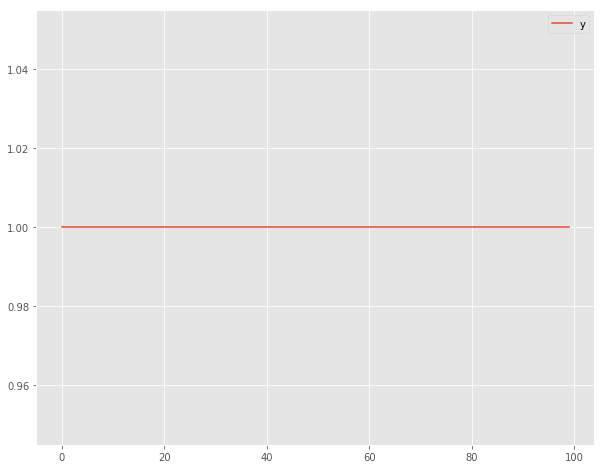

In [47]:
my_df.plot()

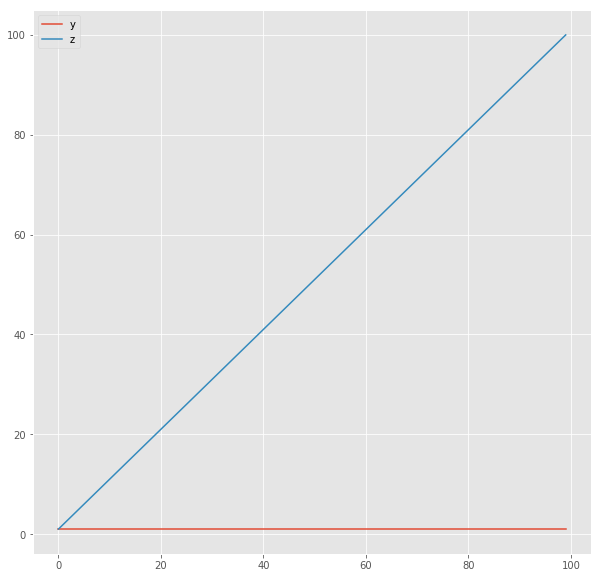

In [79]:
my_df["z"] = my_df.y.cumsum()
my_df.plot()

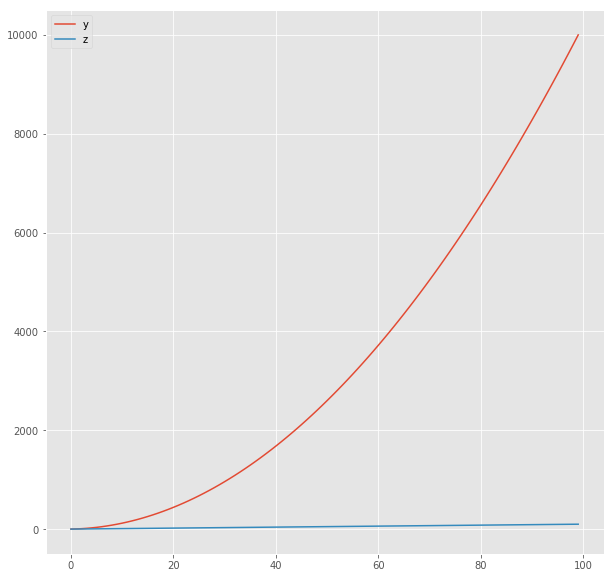

In [80]:
my_df.y = my_df.z ** 2
my_df.plot()

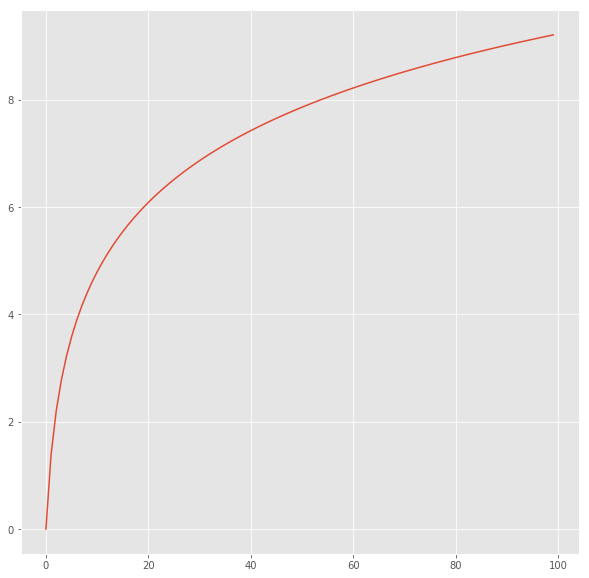

In [81]:
my_df.z = np.log(my_df.y)
my_df.z.plot()

We can plot with different plot types:
    * ‘bar’ or ‘barh’ for bar plots
    * ‘hist’ for histogram
    * ‘box’ for boxplot
    * ‘kde’ or 'density' for density plots
    * ‘area’ for area plots
    * ‘scatter’ for scatter plots
    * ‘hexbin’ for hexagonal bin plots
    * ‘pie’ for pie plots

### Bar

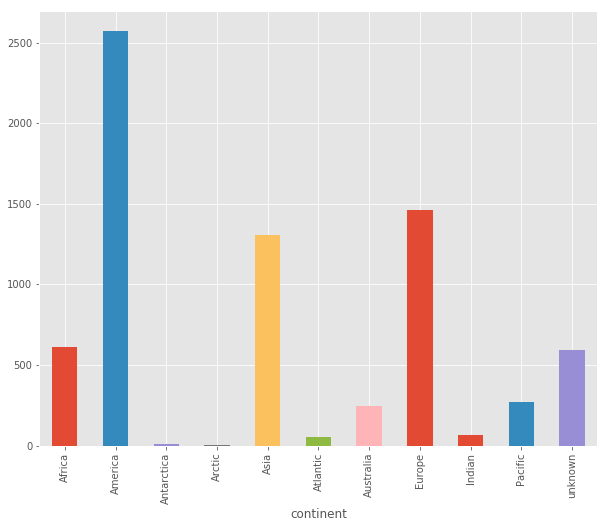

In [48]:
airports.groupby("continent").size().plot.bar()

### Multiple Bars

C:\Users\ip476832\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


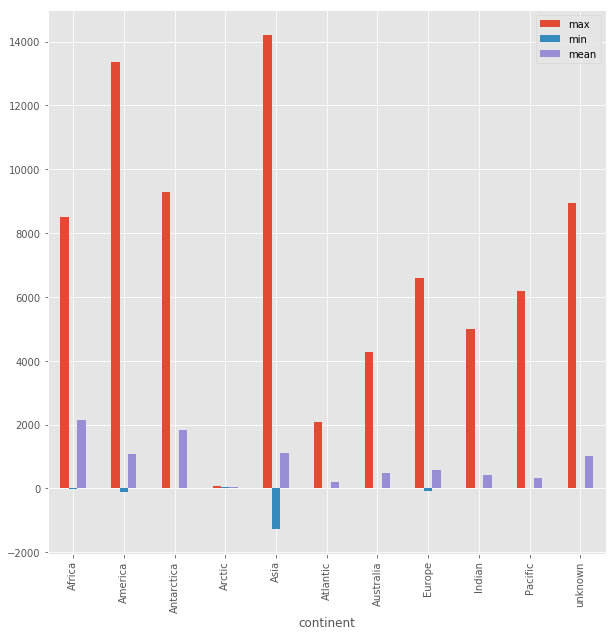

In [83]:
airports.groupby("continent").alt.agg({"max":np.max,"min":np.min,"mean":np.mean}).plot(kind="bar")

C:\Users\ip476832\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


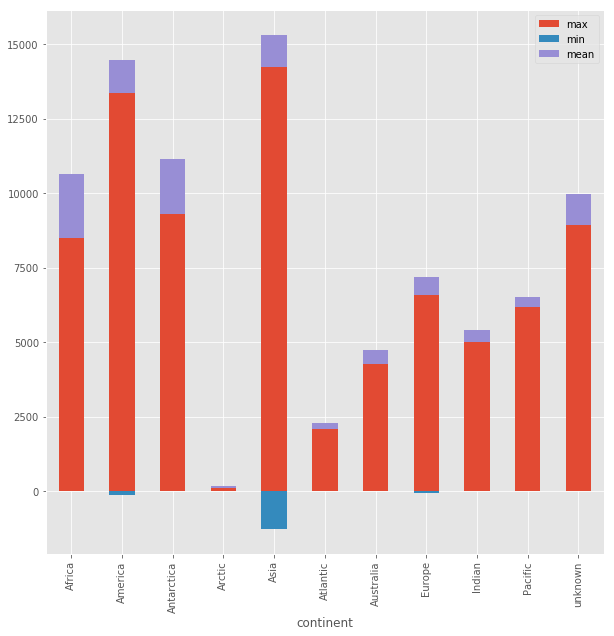

In [84]:
airports.groupby("continent").alt.agg({"max":np.max,"min":np.min,"mean":np.mean}).plot(kind="bar",stacked=True)

C:\Users\ip476832\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


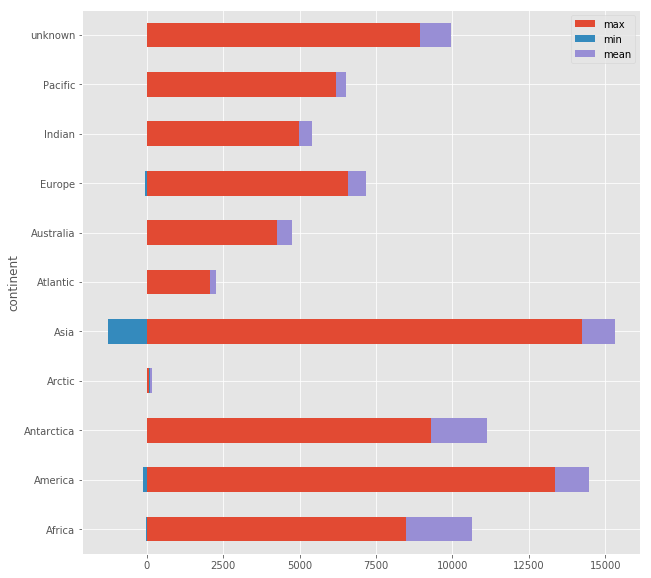

In [85]:
airports.groupby("continent").alt.agg({"max":np.max,"min":np.min,"mean":np.mean}).plot(kind="barh",stacked=True)

### Histogram

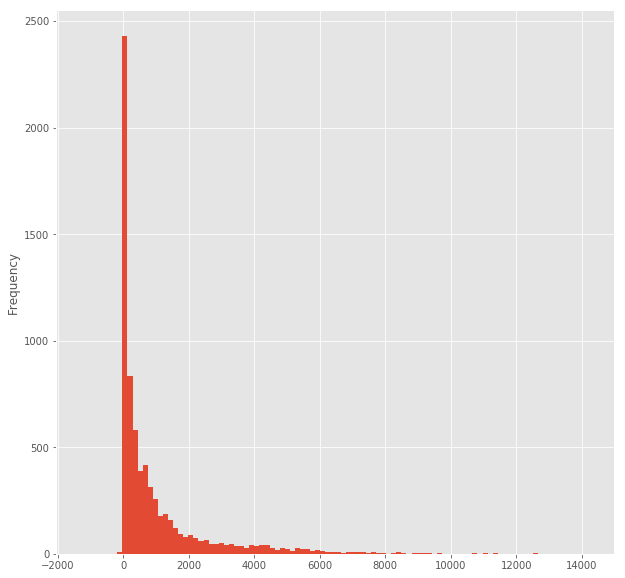

In [86]:
airports.alt.plot(kind="hist",bins=100)

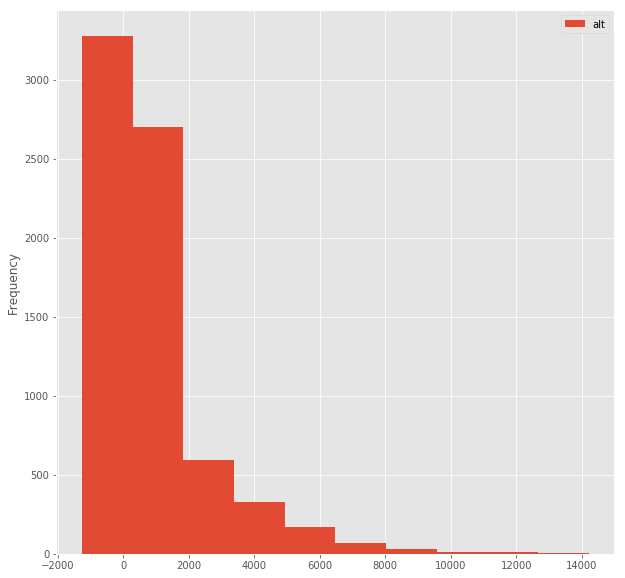

In [87]:
airports.loc[:,["alt"]].plot(kind="hist")

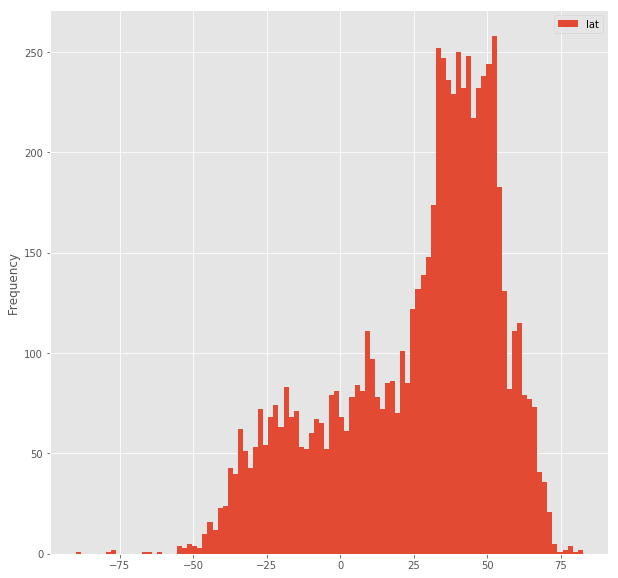

In [88]:
airports.loc[:,["lat"]].plot(kind="hist",bins=100)

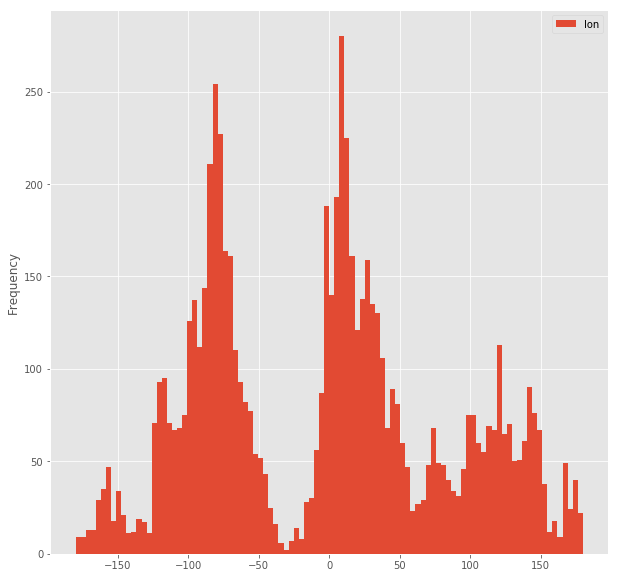

In [89]:
airports.loc[:,["lon"]].plot(kind="hist",bins=100)

### Box Plots

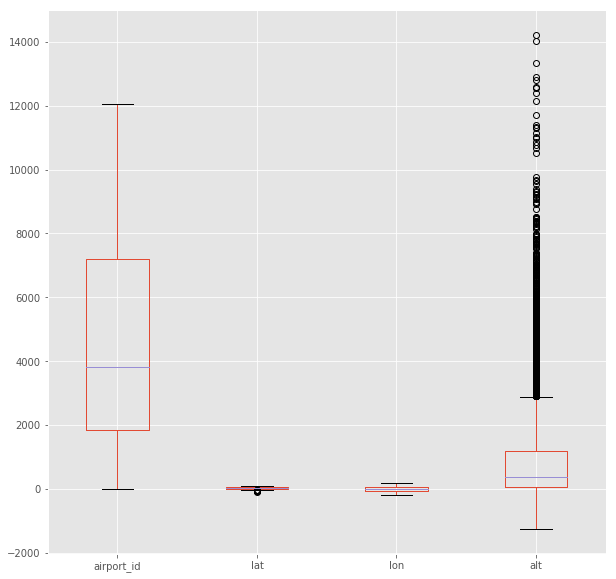

In [90]:
airports.plot.box()

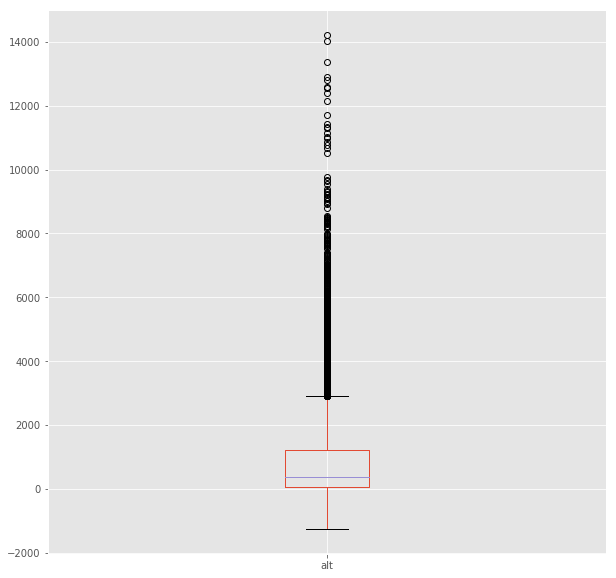

In [91]:
airports.alt.plot.box()

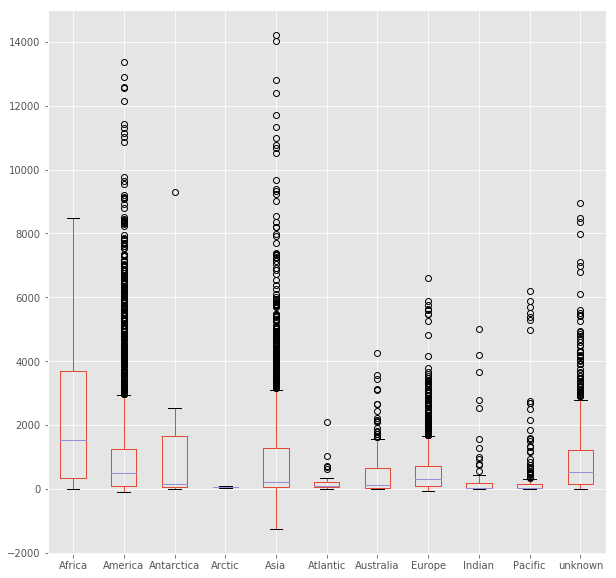

In [92]:
airports.pivot(columns="continent").alt.plot.box()

### Area Plots

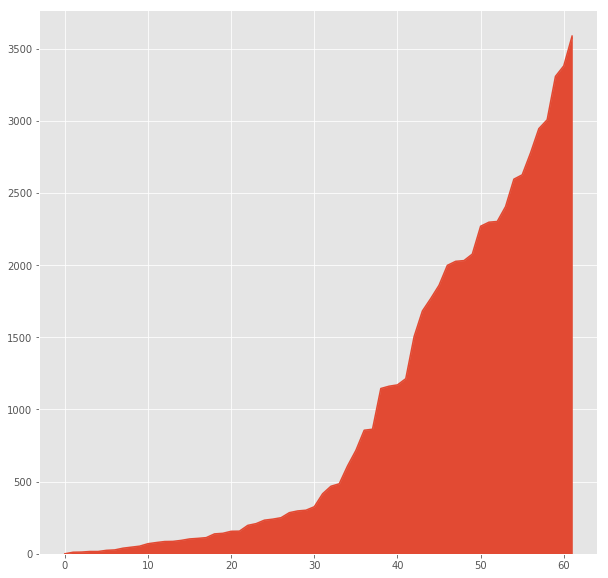

In [93]:
sp_airp = airports[airports.country=="Spain"]
spain_alt = sp_airp.sort_values(by="alt").alt
spain_alt.index = range(spain_alt.size)
spain_alt.plot.area()

### Scatter Plot

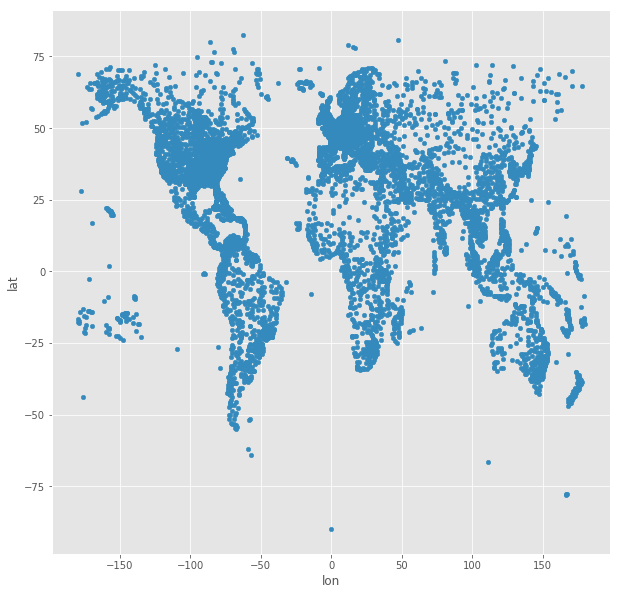

In [94]:
airports.plot.scatter(y="lat",x="lon")

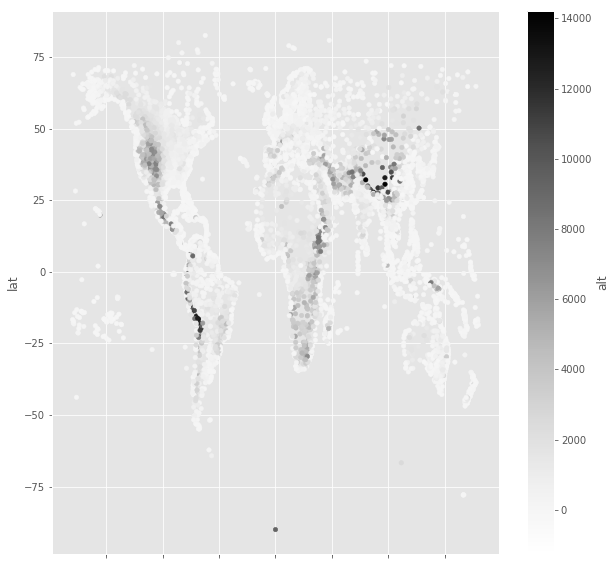

In [95]:
airports.plot.scatter(y="lat",x="lon",c="alt")

C:\Users\ip476832\Anaconda3\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


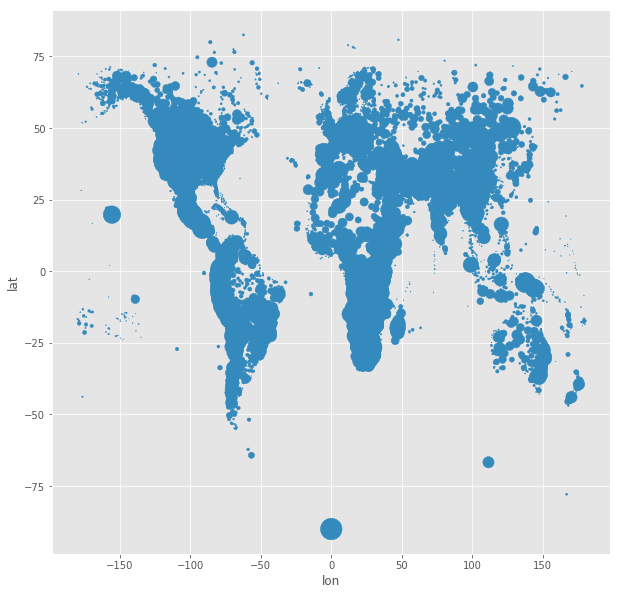

In [96]:
airports.plot.scatter(y="lat",x="lon",s=airports["alt"]/20)

### Hex Bins

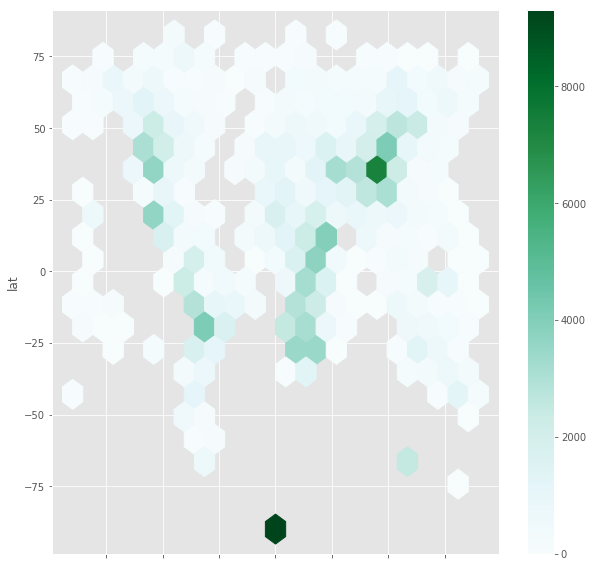

In [97]:
airports.plot.hexbin(x="lon",y="lat",C="alt",gridsize=20)

### Density Plot

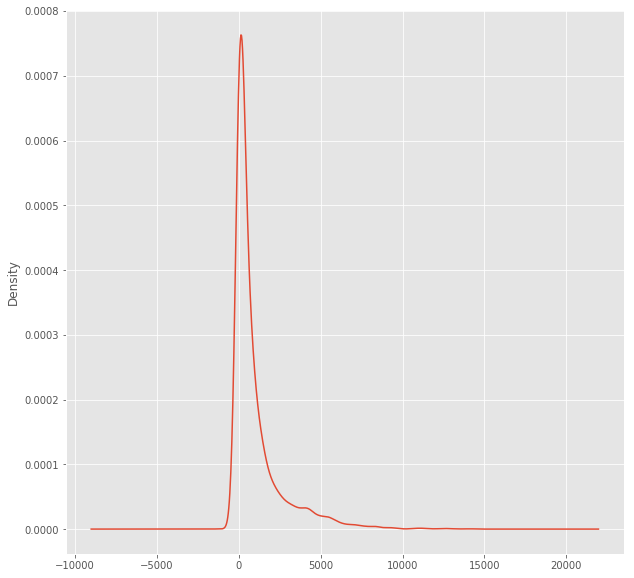

In [98]:
airports.alt.plot.kde()

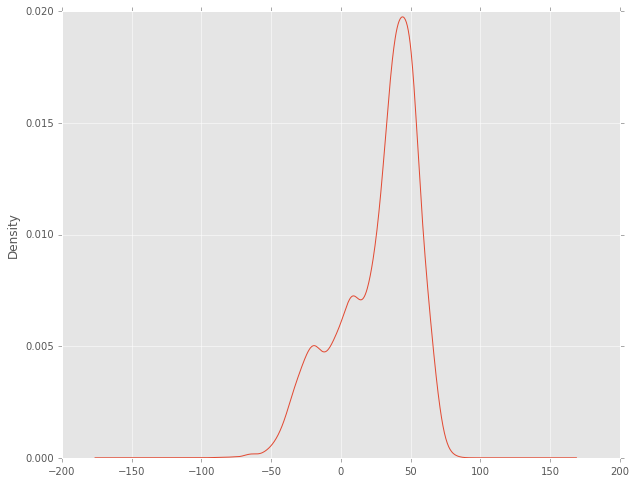

In [79]:
airports.lat.plot.kde()

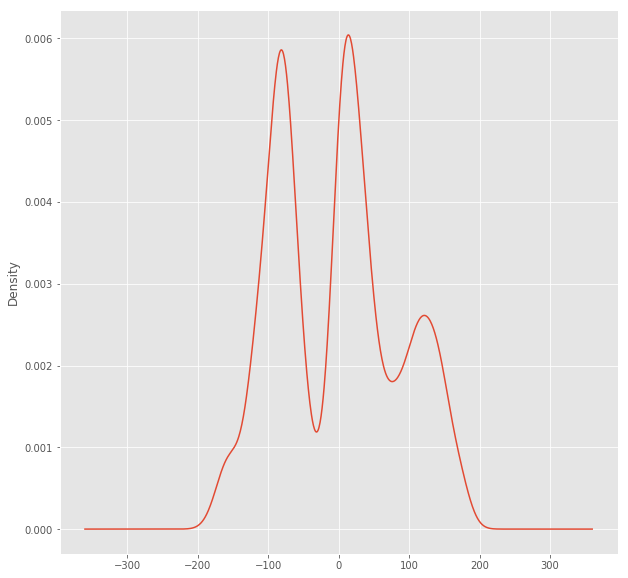

In [99]:
airports.lon.plot.kde()

# Exercices

The exercices will be based over 2016 New Coder Survey, which is a survey answered by 15000 coders and contains 46 questions (each question is a variable).

Data is available https://github.com/FreeCodeCamp/2016-new-coder-survey/blob/master/data/2016-New-Coder-Survey-Data-Summary.csv

Over these dataset, please answer the following questions

*It is highly recommended that instead of cleaning the whole dataset, you do an error and outlier analyisis to each variable that you are going to use before answering the question*

*The variables that you need for each question are in the dataset, you have only to browse and select these that correspond*

** Show in a barplot top 10 nationalities with more responants **

** Show in a barplot top 10 countires with more responants **

** Do an outlier analysis of the ages. How many otliers there are using box-and whiskers? How many using 5%-95% **

** Draw a box plot for ages in USA**

** Show the average Age per country. Which is the country with older respondants? Which the conutry with younger?**

** Do an outlier analysis of the incomes. How many otliers there are using box-and whiskers? How many using 5%-95% **

** Draw a box plot for incomes in Spain**

** Which is the mean income? And the mean income per age? Plot an area plot. Split Incomes into 4 ranges and plot a barplot for top ten respondant countries with 4 bars counting how many people is in each range**

** Do a density plot with incomes **

** Do an histogram with incomes. Select a right number of bins som density plot and histogram are similar **

** Do an scatter plot, ploting age and commut time with a third variable which is income **